# **Final Project**

### **Group 1**

### **A. Introduction**

Team Members:
- Maurits Tobing
- Iznia Azyati
- Talitha Salsabila


**Dataset**: [Coursera Courses Dataset](https://www.kaggle.com/datasets/muhammadanasmahmood/coursera-courses-dataset)

**Hugging Face**:


---


**Problem Statement**

New students hard to find the suitable course based on their preference and knowledge level


**Objectives**:

Developing system recommendation to provide the suitable course based on student’s preference

**Dataset Overview**

Dataset yang digunakan merupakan ...


---

#### **Kolom yang Perlu Di-NLP-kan**

**1. Title (title)**
  - Penjelasan: Nama kursus memberikan gambaran singkat tentang topik utama kursus tersebut.
  - NLP Task: Ekstraksi fitur, analisis kata kunci, dan pembobotan berdasarkan kemiripan kata.

**2. Description (description)**
  - Penjelasan: Deskripsi kursus memberikan detail tentang apa yang akan dipelajari oleh peserta kursus.
  - NLP Task: Analisis sentimen, pengelompokan tematik, dan pembobotan kata untuk mengukur relevansi.

**3. Syllabus (syllabus)**
  - Penjelasan: Silabus memberikan rincian topik-topik spesifik yang dibahas dalam kursus.
  - NLP Task: Ekstraksi topik, analisis frekuensi kata, dan pengelompokan berdasarkan topik.

**4. Modules (modules)**
  - Penjelasan: Modul menunjukkan sub-kategori atau bagian dari kursus yang lebih rinci.
  - NLP Task: Pemetaan modul untuk memahami sub-topik utama dan hubungannya dengan preferensi siswa.

**5. Instructor (instructor)**
  - Penjelasan: Nama dan informasi tentang instruktur dapat memberikan insight tentang keahlian dan pengalaman mereka.
  - NLP Task: Analisis profil instruktur untuk menentukan relevansi dan kredibilitas mereka dalam mengajar kursus tersebut.

#### **Langkah-langkah Analisis dengan NLP**

**1. Preprocessing Teks**
  - Membersihkan teks dari tanda baca, angka, dan karakter khusus.
  - Mengubah teks menjadi huruf kecil.
  - Tokenisasi, yaitu memecah teks menjadi kata-kata individu.
  - Menghapus kata-kata umum yang tidak memberikan informasi penting (stop words).

**2. Ekstraksi Fitur**
  - Menggunakan teknik seperti TF-IDF (Term Frequency-Inverse Document Frequency) untuk menentukan kepentingan kata dalam suatu dokumen.
  - Membuat vektor kata untuk analisis lebih lanjut.

<!-- **3. Pengelompokan dan Pemodelan Topik**
  - Menggunakan teknik seperti LDA (Latent Dirichlet Allocation) untuk menemukan topik-topik utama dalam deskripsi kursus.
  - Mengelompokkan kursus berdasarkan kesamaan topik. -->

**4. Pembuatan Model Rekomendasi**
  - Menggunakan cosine similarity untuk mengukur kemiripan antara preferensi siswa dan deskripsi kursus.- Menggunakan algoritma seperti Collaborative Filtering atau Content-Based Filtering untuk memberikan rekomendasi yang dipersonalisasi.

### **B. Data Loading & Data Checking**


#### **1. Connect to Google Drive and Load Dataset**

In [1]:
from google.colab import drive

# Connect to google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Define the path to the dataset
dataset_path = 'coursera_dataset.csv'


In [5]:
import pandas as pd

# Define the path to the dataset
dataset_path = '/content/drive/My Drive/Final_Project/coursera_dataset.csv'


In [6]:
import pandas as pd

# Load the CSV file
df = pd.read_csv(dataset_path)

# Display the first 5 rows
df.head()

,Unnamed: 0,title,category,type,level,description,price,rating,duration,language,prerequisites,syllabus,modules,instructor,certificate_type,association,image,url,timestamp
0,0,Networking in Google Cloud Specialization,Networking,specializations,Intermediate Level,This specialization gives participants broad s...,free,4.8,Approximately 4 months to complete,English,no prerequisites needed,No specify data,Google Cloud Fundamentals: Core Infrastructure...,"Google Cloud TrainingGoogle Cloud1,482 Courses...",Shareable Certificate,Google Cloud,https://s3.amazonaws.com/coursera_assets/meta_...,https://www.coursera.org/specializations/netwo...,2022-07-29 23:58:34
1,1,Two Speed IT: How Companies Can Surf the Digit...,Business Essentials,course,Beginner Level,"Transform or disappear, the Darwinism of IT: I...",free,4.3,Approx. 14 hours to complete,English,no prerequisites needed,Introduction ~.~ Start here! ~.~ IT and the CI...,"Introduction,IT and the CIO in the Digital Wor...","Antoine GourévitchCentraleSupélec1 Course•21,6...",Shareable Certificate,CentraleSupélec,https://s3.amazonaws.com/coursera_assets/meta_...,https://www.coursera.org/learn/2-speed-it,2022-07-29 23:58:34
2,2,Fundamentals of Network Communication,Computer Security and Networks,course,Intermediate Level,"In this course, we trace the evolution of netw...",free,4.6,Approx. 15 hours to complete,English,no prerequisites needed,Communication Networks and Services ~.~ This m...,"Communication Networks and Services,Layered Ar...",Xiaobo ZhouUniversity of Colorado System4 Cour...,Shareable Certificate,University of Colorado System,https://s3.amazonaws.com/coursera_assets/meta_...,https://www.coursera.org/learn/fundamentals-ne...,2022-07-29 23:58:54
3,3,Design a User Experience for Social Good & Pre...,Design and Product,course,Beginner Level,Design a User Experience for Social Good and P...,free,4.8,Approx. 71 hours to complete,English,no prerequisites needed,"Starting the UX design process: empathize, def...",Design for social good and strengthen your por...,Top InstructorGoogle Career CertificatesGoogle...,Shareable Certificate,Google,https://s3.amazonaws.com/coursera_assets/meta_...,https://www.coursera.org/learn/ux-design-jobs,2022-07-29 23:59:20
4,4,Building Database Applications in PHP,Mobile and Web Development,course,Intermediate Level,"In this course, we'll look at the object orien...",free,4.9,Approx. 24 hours to complete,English,no prerequisites needed,PHP Objects ~.~ We look at the object oriented...,"PHP Objects,Connecting PHP and MySQL,PHP Cooki...",Charles Russell SeveranceUniversity of Michiga...,Shareable Certificate,University of Michigan,https://s3.amazonaws.com/coursera_assets/meta_...,https://www.coursera.org/learn/database-applic...,2022-07-29 23:59:20


In [7]:
# Check data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        208 non-null    int64  
 1   title             208 non-null    object 
 2   category          208 non-null    object 
 3   type              208 non-null    object 
 4   level             208 non-null    object 
 5   description       208 non-null    object 
 6   price             208 non-null    object 
 7   rating            208 non-null    float64
 8   duration          208 non-null    object 
 9   language          208 non-null    object 
 10  prerequisites     208 non-null    object 
 11  syllabus          208 non-null    object 
 12  modules           208 non-null    object 
 13  instructor        208 non-null    object 
 14  certificate_type  208 non-null    object 
 15  association       208 non-null    object 
 16  image             208 non-null    object 
 1

In [8]:
# Check missing values
df.isnull().sum()

Unnamed: 0          0
title               0
category            0
type                0
level               0
description         0
price               0
rating              0
duration            0
language            0
prerequisites       0
syllabus            0
modules             0
instructor          0
certificate_type    0
association         0
image               0
url                 0
timestamp           0
dtype: int64

<Axes: >

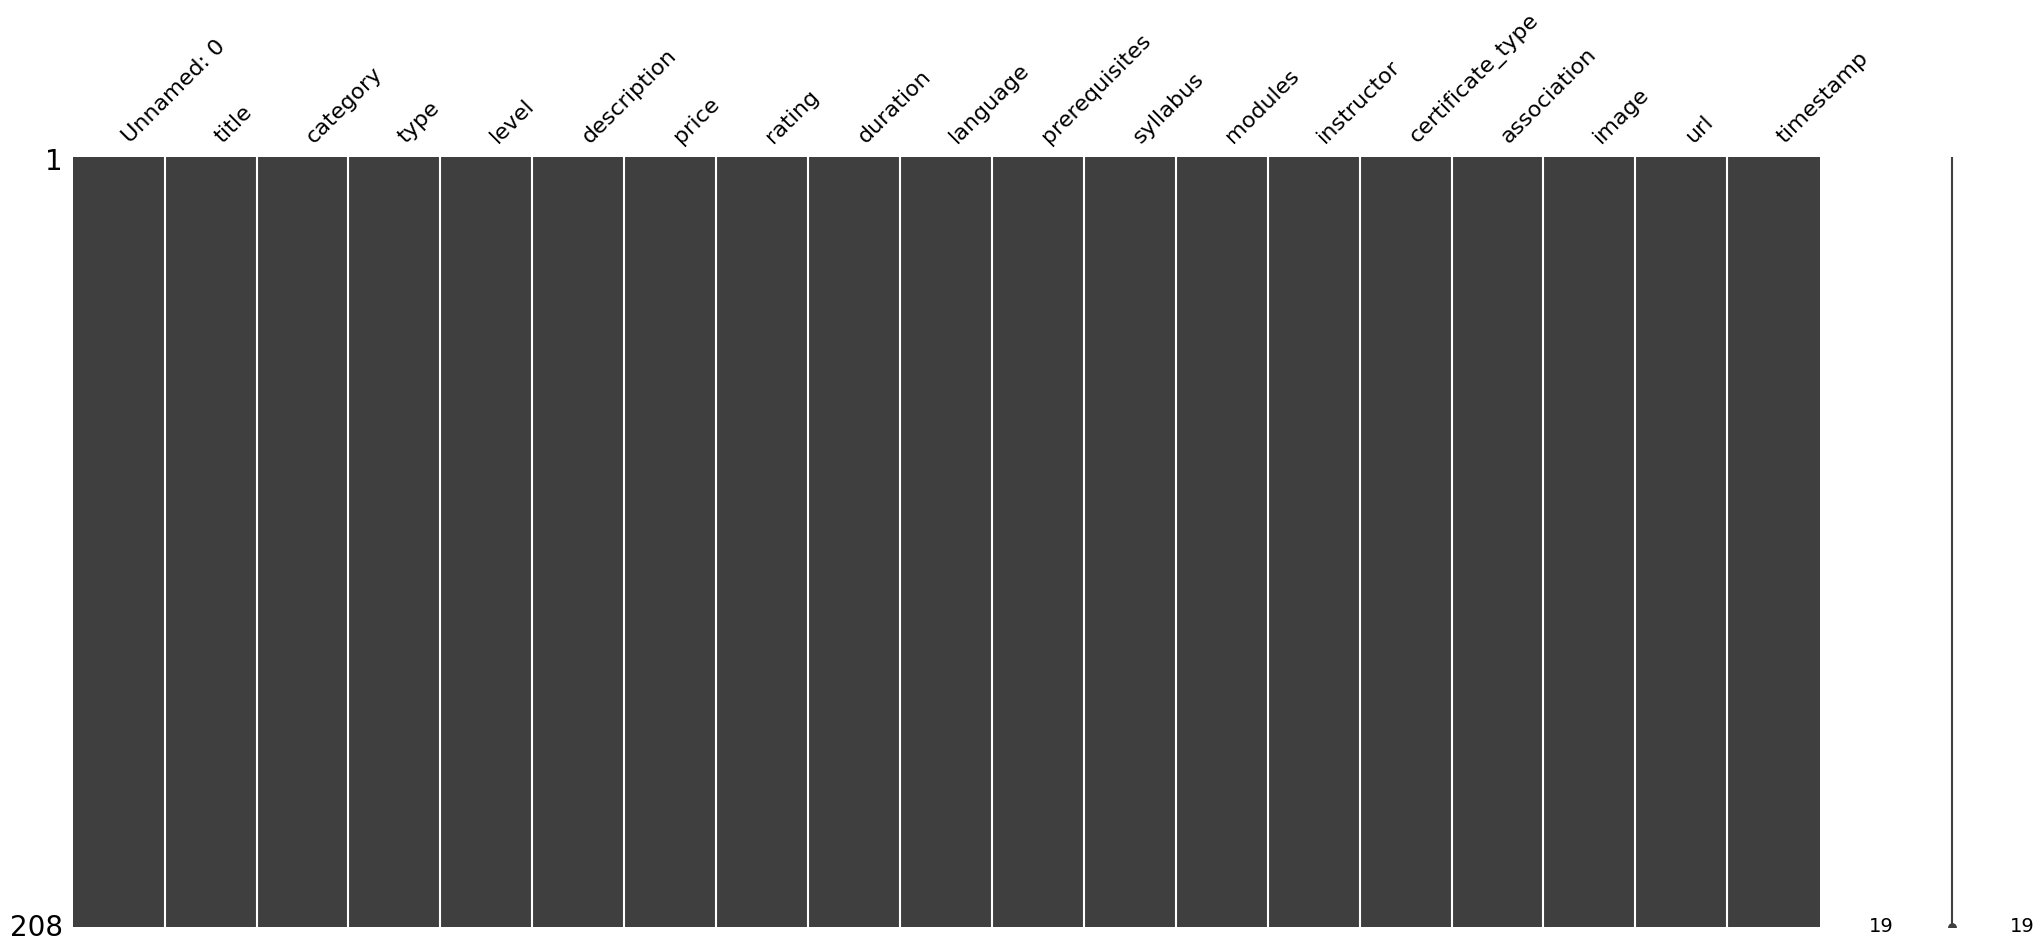

In [9]:
import missingno as msno
import pandas as pd

# Visualize data
msno.matrix(df)

Setelah identifikasi missing value, langkah selanjutnya adalah cek duplikat rows dalam dataset dengan `duplicated().sum()`

#### **2. Check for Duplicates**

In [10]:
# Check total of duplicated rows
df.duplicated().sum()

0

Hasilnya dikonfirmasi bahwa tidak ada baris yang duplikat pada dataset.

#### **3. Check Column Names**

In [11]:
# Check column names
df.columns

Index(['Unnamed: 0', 'title', 'category', 'type', 'level', 'description',
       'price', 'rating', 'duration', 'language', 'prerequisites', 'syllabus',
       'modules', 'instructor', 'certificate_type', 'association', 'image',
       'url', 'timestamp'],
      dtype='object')

### **C. Feature Engineering**

#### **1. Drop Kolom Tidak Terpakai**

Setelah data loading dan data checking, selanjutnya dilakukan preprocessing teks pada kolom-kolom yang relevan seperti `title`, `description`, `syllabus`, `modules`, dan `instructor`. Jadi kolom-kolom yang tidak relevan akan di drop.

In [12]:
# Drop unnecessary columns
df.drop(['Unnamed: 0', 'category', 'type', 'level','price', 'rating', 'duration',
         'language', 'prerequisites', 'certificate_type', 'association', 'image',
         'url', 'timestamp'], axis = 1, inplace = True)

# Show the first 5 rows
df.head()

,title,description,syllabus,modules,instructor
0,Networking in Google Cloud Specialization,This specialization gives participants broad s...,No specify data,Google Cloud Fundamentals: Core Infrastructure...,"Google Cloud TrainingGoogle Cloud1,482 Courses..."
1,Two Speed IT: How Companies Can Surf the Digit...,"Transform or disappear, the Darwinism of IT: I...",Introduction ~.~ Start here! ~.~ IT and the CI...,"Introduction,IT and the CIO in the Digital Wor...","Antoine GourévitchCentraleSupélec1 Course•21,6..."
2,Fundamentals of Network Communication,"In this course, we trace the evolution of netw...",Communication Networks and Services ~.~ This m...,"Communication Networks and Services,Layered Ar...",Xiaobo ZhouUniversity of Colorado System4 Cour...
3,Design a User Experience for Social Good & Pre...,Design a User Experience for Social Good and P...,"Starting the UX design process: empathize, def...",Design for social good and strengthen your por...,Top InstructorGoogle Career CertificatesGoogle...
4,Building Database Applications in PHP,"In this course, we'll look at the object orien...",PHP Objects ~.~ We look at the object oriented...,"PHP Objects,Connecting PHP and MySQL,PHP Cooki...",Charles Russell SeveranceUniversity of Michiga...


#### **2. Preprocessing Text**

In [13]:
pip install nltk


In [14]:
import pandas as pd
import re
from nltk.corpus import stopwords
from collections import Counter
import nltk

# Ensure stopwords are downloaded
nltk.download('stopwords')

# Preprocessing function
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenization
    tokens = text.split()
    # Remove stop words
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

# Apply preprocessing to the columns
df['title_clean'] = df['title'].apply(preprocess_text)
df['description_clean'] = df['description'].apply(preprocess_text)
df['syllabus_clean'] = df['syllabus'].apply(preprocess_text)
df['modules_clean'] = df['modules'].apply(preprocess_text)
df['instructor_clean'] = df['instructor'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#### **3. Combine Cleaned Text**

Selanjutnya menggabungkan teks dari kolom-kolom yang telah diproses menjadi satu kolom.



In [15]:
# Combine the cleaned text data into one column
df['combined_clean'] = df['title_clean'] + " " + df['description_clean'] + " " + df['syllabus_clean'] + " " + df['modules_clean'] + " " + df['instructor_clean']


### **D. Text Vectorization dan Similarity Calculation**

#### **1. Text Vectorization**

- Mengubah teks menjadi representasi vektor menggunakan TF-IDF
- Menghitung matriks kesamaan menggunakan cosine similarity

In [16]:
# Text Vectorization dan Similarity Calculation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Text Vectorization using TF-IDF
tfidf = TfidfVectorizer(analyzer = 'word', ngram_range = (1, 2), min_df = 2, stop_words = "english")
tfidf_desc = tfidf.fit(df['combined_clean'])


#### **2. Similarity Calculation dan Pembuatan Model Rekomendasi**

In [17]:
# input usernya
user_input = input("Describe the courses you are looking for: ")

# cek inputan user, kalau tidak kosong
if user_input.strip():

    # konversi input user jadi representasi TF-IDF
    user_tfidf = tfidf_desc.transform([user_input])

    # hitung similarity dengan deskripsi buku lain dalam dataset
    similarities = cosine_similarity(user_tfidf, tfidf_desc.transform(df['combined_clean']))

    # ambil top 10 buku dengan cosine similarity tertinggi dengan input user
    top_indices = similarities.argsort()[0][-10:][::-1]

    # munculkan hasil rekomendasi ke user
    print(f'Input: {user_input}\n')
    print("From your input we can recommend:\n")
    for idx in top_indices:
        print("Title:", df.iloc[idx]['title_clean'])
        print("Description:", df.iloc[idx]['description_clean'])
        print("Syllabus:", df.iloc[idx]['syllabus_clean'])
        print("Modules:", df.iloc[idx]['modules_clean'])
        print("Instructor:", df.iloc[idx]['instructor_clean'])
        print("Cosine Similarity:", similarities[0][idx])
        print()

# kalau user tidak memberi inputan
else:
    print('Please provide the description.')

Describe the courses you are looking for: communication
Input: communication

From your input we can recommend:

Title: communication strategies virtual age
Description: communication changed traditional rules speaking presenting meeting coordination influencing people negotiating selling ideas longer apply world skype messenger video teleconference course act overview several concepts could course goal give tools practice perfect
Syllabus: introduction virtual teams virtual communication module intended create foundation course challenging ideas virtual communication means also communication whole module also introduce foundational ideas whole course virtual meetings boring awesome module cover meetings person virtually discuss make meetings dramatically efficient effective also introduce strategies make meetings interactive keep audiences attention especially looking screen influence power questioning strategies virtual collaboration module move presenting convincing persuading ideas

**DI BAWAH INI CODE YANG SALAH**

In [18]:
# # Menghitung Frekuensi Kata (Optional)
# df['word_list'] = df['combined_clean'].apply(lambda x: x.split())
# word_count = Counter([item for sublist in df['word_list'] for item in sublist])
# word_freq_df = pd.DataFrame(word_count.most_common(70), columns=['Words', 'Count'])
# word_freq_df.style.background_gradient(cmap='Blues')

In [19]:
# # Define Stopwords
# stpwds_id = list(set(stopwords.words('english')))

# # Add custom stopwords
# custom_stopwords = ['the', 'to', 'and', 'I', 'was', 'a', 'in', 'of', ' for', 'on', 'flight', 'with', 'that', 'my', 'is', 'not', 'were', 'they',
#                     'The', 'at', 'we', 'had', 'from', 'but', 'have', 'it', 'this', 'no', 'as', 'me', 'you', 'our', 'be', 'are', 'an', 'very', 'so',
#                     'service', 'their', 'We', 'time','airline', 'would', 'or', 'us', 'by', 'only', 'get', 'all' 'which']
# #
# # Extend the stopwords
# stpwds_id.extend(custom_stopwords)

In [20]:
# from nltk.stem import PorterStemmer

# # Define Stemming
# stemmer = PorterStemmer()

In [21]:
# from nltk.tokenize import word_tokenize


# # Create A Function for Text Preprocessing
# def text_preprocessing(text):

#     # Case folding
#     text = text.lower()

#     # Mention removal
#     text = re.sub(r'https?://(?:www\.[^\s\n\r]+|[^\s\n\r]+)', '', text)

#     # Hashtags removal
#     text = re.sub(r'#', '', text)

#     # Newline removal (\n)
#     text = re.sub(r'[\n\r]', '', text)

#     # Replaces the numbers with an empty string
#     text = re.sub(r'\d+', '', text)

#     # Whitespace removal
#     text = text.strip()

#     # URL removal
#     text = re.sub(r"http\S+", " ", text)
#     text = re.sub(r"www.\S+", " ", text)

#     # Non-letter removal (such as emoticon, symbol (like μ, $, 兀), etc.)
#     text = re.sub("[^A-Za-z\s']", " ", text)

#     # Tokenization
#     tokens = word_tokenize(text)

#     # Stopwords removal
#     tokens = [word for word in tokens if word not in stpwds_id]

#     # Stemming
#     tokens = [stemmer.stem(word) for word in tokens]

#     # Combining Tokens
#     text = ' '.join(tokens)

#     return text

In [22]:
# import nltk
# nltk.download('punkt')

In [23]:
# # Applying Text Preprocessing to the Dataset
# df['neew_combined'] = df['combined_clean'].apply(lambda x: text_preprocessing(x))

# # Show the first 5 rows
# df.head()

In [24]:
# # Instal langdetect
# !pip install langdetect

In [25]:
# import pandas as pd
# from langdetect import detect, DetectorFactory
# from langdetect.lang_detect_exception import LangDetectException
# import nltk
# from nltk.corpus import stopwords

# # Pastikan untuk mendownload stopwords NLTK dan tokenizer
# nltk.download('stopwords')
# nltk.download('punkt')

# # Untuk hasil yang konsisten
# DetectorFactory.seed = 0

# # kolom teks dalam dataset
# text_column = 'combined_clean'

# # Fungsi untuk mendeteksi bahasa
# def detect_language(word):
#     try:
#         return detect(word)
#     except LangDetectException:
#         return "unknown"

In [26]:
# # Menggabungkan semua teks dalam satu kolom menjadi satu string besar
# all_text = ' '.join(df[text_column].astype(str).tolist())

# # Menghapus karakter non-alfabetik selain spasi untuk memastikan kata-kata dipisahkan dengan benar
# all_text = ''.join([char if char.isalpha() or char.isspace() else ' ' for char in all_text])

# # Tokenisasi
# words = nltk.word_tokenize(all_text)

# # Menghapus tanda baca (pastikan hanya kata alfanumerik)
# words = [word for word in words if word.isalnum()]

# # Deteksi bahasa dan filter hanya bahasa Inggris
# english_words = [word for word in words if detect_language(word) == 'en']

# # Menghapus stopwords bahasa Inggris
# stopwords_english = set(stopwords.words('english'))
# filtered_words = [word for word in english_words if word.lower() not in stopwords_english]

# # Menampilkan kata-kata yang tersisa
# print(filtered_words[:50])

# # Menyimpan kata-kata yang tersisa ke file baru jika diperlukan
# filtered_words_df = pd.DataFrame(filtered_words, columns=['word'])
# filtered_words_df.to_csv("filtered_words.csv", index=False)

Selanjutnya, **menghitung frekuensi kata-kata** yang muncul dalam teks gabungan.
